<a href="https://colab.research.google.com/github/marcelo0211/arquivos/blob/master/projeto01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install uszipcode
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from uszipcode import SearchEngine
from yellowbrick.features import Rank2D



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
df= pd.read_csv('/content/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [65]:
#Renomeando as colunas 
dfbra = df.rename(columns={'date':'data','price':'preco','bedrooms':'nr_quartos',
                   'bathrooms':'nr_banheiros',
                   'sqft_living':'area_habitável',
                   'sqft_lot':'area_terreno',
                   'floors':'nr_andares',
                   'waterfront':'beira_mar',
                   'view':'beleza_vista_mar',
                   'condition':'condicoes_imovel',
                   'grade':'Class_qualid_mat',
                   'sqft_above':'area_acima_solo',
                   'sqft_basement':'area_abaixo_solo',
                   'yr_built':'ano_construcao',
                   'yr_renovated':'ano_restauracao',
                   'zipcode':'cep',
                   'lat':'latitude',
                   'long':'longitude',
                   'sqft_living15':'med_area_abt15',
                   'sqft_lot15':'med_area_lote_15'})


In [66]:
#Verificar o tipo de registros e ajustar
dfbra.dtypes

id                    int64
data                 object
preco               float64
nr_quartos            int64
nr_banheiros        float64
area_habitável        int64
area_terreno          int64
nr_andares          float64
beira_mar             int64
beleza_vista_mar      int64
condicoes_imovel      int64
Class_qualid_mat      int64
area_acima_solo       int64
area_abaixo_solo      int64
ano_construcao        int64
ano_restauracao       int64
cep                   int64
latitude            float64
longitude           float64
med_area_abt15        int64
med_area_lote_15      int64
dtype: object

In [67]:
dfbra.nr_andares = dfbra.nr_andares.astype(int)
dfbra.ano_construcao= dfbra.ano_construcao .astype(str)
dfbra.ano_restauracao= dfbra.ano_restauracao .astype(str)
dfbra.data = dfbra.data.astype(str)



In [68]:
dfbra.dtypes

id                    int64
data                 object
preco               float64
nr_quartos            int64
nr_banheiros        float64
area_habitável        int64
area_terreno          int64
nr_andares            int64
beira_mar             int64
beleza_vista_mar      int64
condicoes_imovel      int64
Class_qualid_mat      int64
area_acima_solo       int64
area_abaixo_solo      int64
ano_construcao       object
ano_restauracao      object
cep                   int64
latitude            float64
longitude           float64
med_area_abt15        int64
med_area_lote_15      int64
dtype: object

In [69]:
#Eliminando colunas desnecessarias 
dfbra=dfbra.drop(['id','latitude','longitude'], axis = 1)
dfbra

,data,preco,nr_quartos,nr_banheiros,area_habitável,area_terreno,nr_andares,beira_mar,beleza_vista_mar,condicoes_imovel,Class_qualid_mat,area_acima_solo,area_abaixo_solo,ano_construcao,ano_restauracao,cep,med_area_abt15,med_area_lote_15
0,20141013T000000,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [70]:
# Limpando registro data 'T000000'
dfbra = dfbra.replace('T000000',' ', regex=True)
dfbra

,data,preco,nr_quartos,nr_banheiros,area_habitável,area_terreno,nr_andares,beira_mar,beleza_vista_mar,condicoes_imovel,Class_qualid_mat,area_acima_solo,area_abaixo_solo,ano_construcao,ano_restauracao,cep,med_area_abt15,med_area_lote_15
0,20141013,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521,360000.0,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,20150223,400000.0,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,20140623,402101.0,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,20150116,400000.0,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [81]:
#Definindo a coluna cidade de acordo com o CEP

engine = SearchEngine()
dfbra['cidade']= None
for i,row in dfbra.iterrows():
  zipcode = engine.by_zipcode(df['zipcode'][i])
  dfbra['cidade'][i] = zipcode.major_city

dfbra  


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


<ipython-input-81-d589f7dfb821>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbra['cidade'][i] = zipcode.major_city


,data,preco,nr_quartos,nr_banheiros,area_habitável,area_terreno,nr_andares,beira_mar,beleza_vista_mar,condicoes_imovel,Class_qualid_mat,area_acima_solo,area_abaixo_solo,ano_construcao,ano_restauracao,cep,med_area_abt15,med_area_lote_15,cidade
0,20141013,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,Seattle
1,20141209,538000.0,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639,Seattle
2,20150225,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,Kenmore
3,20141209,604000.0,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,Seattle
4,20150218,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521,360000.0,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,1530,1509,Seattle
21609,20150223,400000.0,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,1830,7200,Seattle
21610,20140623,402101.0,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,1020,2007,Seattle
21611,20150116,400000.0,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,1410,1287,Issaquah


In [87]:
#FIM DO AJUSTE E LIMPEZA DE DADOS 
# INICIO DA ANALISE DADAS 
#Trabalhando com a CORRELACAO

dfbra.corr()

,preco,nr_quartos,nr_banheiros,area_habitável,area_terreno,nr_andares,beira_mar,beleza_vista_mar,condicoes_imovel,Class_qualid_mat,area_acima_solo,area_abaixo_solo,cep,med_area_abt15,med_area_lote_15
preco,1.000000,0.308350,0.525138,0.702035,0.089661,0.237211,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,-0.053203,0.585379,0.082447
nr_quartos,0.308350,1.000000,0.515884,0.576671,0.031703,0.155643,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,0.391638,0.029244
nr_banheiros,0.525138,0.515884,1.000000,0.754665,0.087740,0.519019,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.568634,0.087175
area_habitável,0.702035,0.576671,0.754665,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.756420,0.183286
area_terreno,0.089661,0.031703,0.087740,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,0.144608,0.718557
nr_andares,0.237211,0.155643,0.519019,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,-0.235836,-0.096743,0.296561,-0.013252
beira_mar,0.266369,-0.006582,0.063744,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,0.086463,0.030703
beleza_vista_mar,0.397293,0.079532,0.187737,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.280439,0.072575
condicoes_imovel,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.092824,-0.003406
Class_qualid_mat,0.667434,0.356967,0.664983,0.762704,0.113621,0.472608,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.184862,0.713202,0.119248


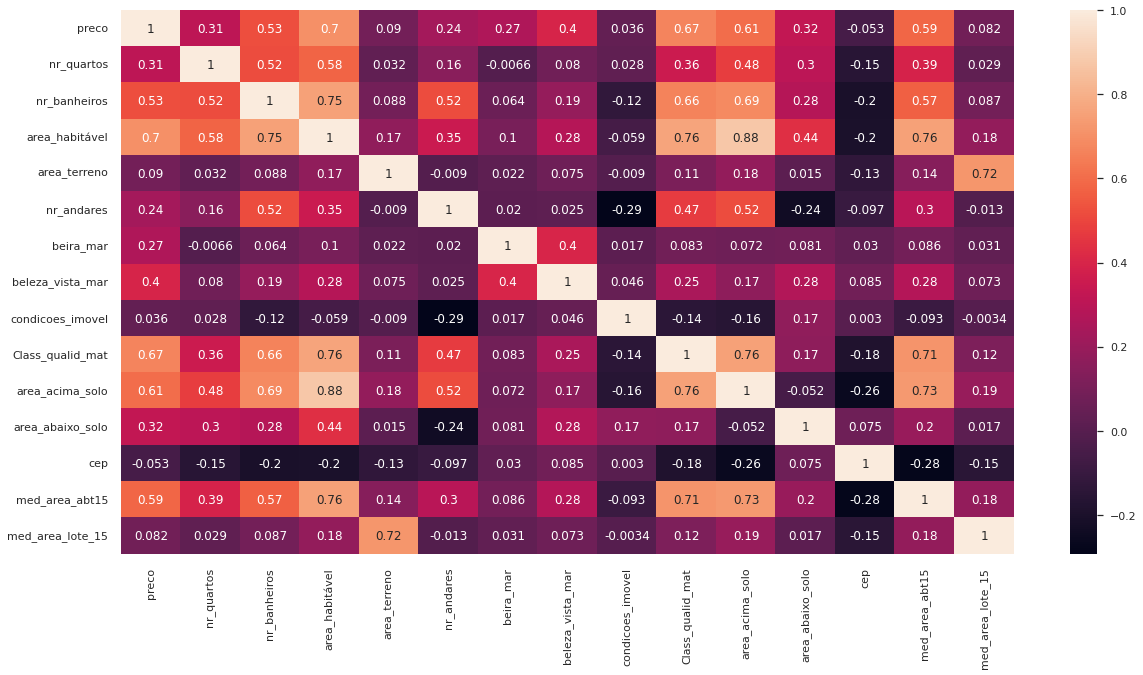

In [92]:
#Usando o Grafico para Correlacao - MAPA DE CALOR- 
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(dfbra.corr(), annot = True);

